In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Sums of Independent Normal Variables ##

This section consists of examples based on one important fact:

**The sum of independent normal variables is normal.**

We will prove the fact in a later section using moment generating functions. For now, we will just run a quick simulation and then see how to use the fact in examples.

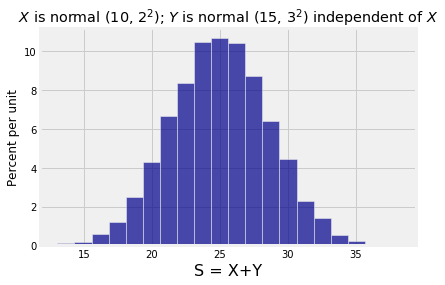

In [2]:
mu_X = 10
sigma_X = 2
mu_Y = 15
sigma_Y = 3
x = stats.norm.rvs(mu_X, sigma_X, size=10000)
y = stats.norm.rvs(mu_Y, sigma_Y, size=10000)
s = x+y
Table().with_column('S = X+Y', s).hist(bins=20)
plt.title('$X$ is normal (10, $2^2$); $Y$ is normal (15, $3^2$) independent of $X$');

The simulation above generates 10,000 copies of $X+Y$ where $X$ has the normal distribution with mean 10 and SD 2 and $Y$ is independent of $X$ and has the normal distribution with mean 15 and SD 3. The distribution of the sum is clearly normal. You can vary the parameters and check that the distribution of the sum has the same shape, though with different labels on the axes.

To identify which normal, you have to find the mean and variance of the sum. Just use properties of the mean and variance:

If $X$ has the normal $(\mu_X, \sigma_X^2)$ distribution, and $Y$ independent of $X$ has the normal $(\mu_Y, \sigma_Y^2)$ distribution, then the distribution of $X+Y$ is normal with mean $\mu_X + \mu_Y$ and variance $\sigma_X^2 + \sigma_Y^2$.

This means that we don't need the joint density of $X$ and $Y$ to find probabilities of events determined by $X+Y$.

### Sums of IID Normal Variables ###
Let $X_1, X_2, \ldots, X_n$ be i.i.d. normal with mean $\mu$ and variance $\sigma^2$. Let $S_n = X_1 + X_2 + \ldots + X_n$. Then the distribution of $S_n$ is normal with mean $n\mu$ and variance $n\sigma^2$.

This looks rather like the Central Limit Theorem but notice that there is no assumption that $n$ is large, and no approximation. 

If the underlying distribution is normal, then the distribution of the i.i.d. sample sum is normal regardless of the sample size.

### The Difference of Two Independent Normal Variables ###
If $Y$ is normal, then so is $-Y$. So if $X$ and $Y$ are independent normal variables then $X-Y$ is normal with mean $\mu_X - \mu_Y$ and variance given by

$$
Var(X - Y) ~ = ~
Var(X) + Var(-Y) ~ = ~
\sigma_X^2 + (-1)^2\sigma_Y^2 ~ = ~
\sigma_X^2 + \sigma_Y^2
$$

For example, let the heights of Persons A and B be $H_A$ and $H_B$ respectively, and suppose $H_A$ and $H_B$ are i.i.d. normal with mean 66 inches and SD 3 inches. Then the chance that Person A is more than 2 inches taller than Person B is

$$
P(H_A > H_B + 2) = P(H_A - H_B > 2) = 1 - \Phi\big{(}\frac{2 - 0}{\sqrt{18}}\big{)}
$$

because $H_A - H_B$ is normal with mean 0 and SD $\sqrt{3^2 + 3^2} = \sqrt{18} = 4.24$ inches.

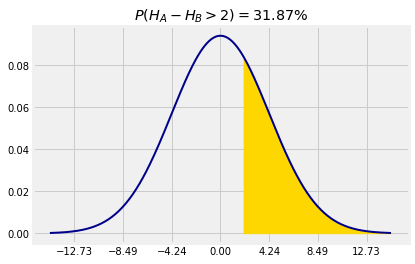

In [3]:
# NO CODE
mu = 0
sigma = 18**0.5
x = np.arange(mu - 3.5*sigma, mu + 3.5*sigma+0.1, 0.1)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='darkblue', lw=2)
w = np.arange(2, mu+3.5*sigma+0.1, 0.1)
plt.fill_between(w, stats.norm.pdf(w, mu, sigma), color='gold')
plt.xticks(np.arange(mu-3*sigma, mu+3*sigma+0.1, sigma))
plt.title('$P(H_A - H_B > 2) = 31.87\%$');

In [4]:
mu = 0
sigma = 18**0.5
1 - stats.norm.cdf(2, mu, sigma)

0.31867594411696853

### Comparing Two Sample Proportions ###
A candidate is up for election. In State 1, 50% of the voters favor the candidate. In State 2, only 27% of the voters favor the candidate. A simple random sample of 1000 voters is taken in each state. You can assume that the samples are independent of each other and that there are millions of voters in each state.

**Question.** Approximately what is the chance that in the sample from State 1, the proportion of voters who favor the candidate is more than twice as large as the proportion in the State 2 sample?

**Answer.** For $i = 1, 2$, let $X_i$ be the proportion of voters who favor the candidate in the sample from State $i$. We want the approximate value of $P(X_1 > 2X_2)$. By the Central Limit Theorem, both $X_1$ and $X_2$ are approximately normal. So $X_1 - 2X_2$ is also approximately normal.

Now it's just a matter of figuring out the mean and the SD.

$$
E(X_1 - 2X_2) ~ = ~ 0.5 - 2\times 0.27 = -0.04
$$

$$
Var(X_1) = \frac{0.5 \times 0.5}{1000} = 0.00025, ~~~~~~
Var(X_2) = \frac{0.27 \times 0.73}{1000} = 0.000197
$$

$$
Var(X_1 - 2X_2) = Var(X_1) + 4Var(X_2) = 0.00104, ~~~~~~
SD(X_1 - 2X_2) = 0.03222
$$

So

$$
P(X_1 > 2X_2) ~ = ~ P(X_1 - 2X_2 > 0) 
~ \approx ~ 1 - \Phi \big{(} \frac{0 - (-0.04)}{0.03222} \big{)}
~ \approx ~ 10.7\%
$$


In [5]:
mu = 0.5 - 2*0.27
var = (0.5*0.5/1000) + 4*(0.27*.73/1000)
sigma = var**0.5
1 - stats.norm.cdf(0, mu, sigma)

0.1072469993885582

```{admonition} Quick Check
$X$ is normal $(20, 5^2)$ and $Y$ is normal $(75, 10^2)$. Assume $X$ and $Y$ are independent. 

Sketch the density of $Y - 2X$. Mark the numerical values of the expectation and SD appropriately on your sketch. You can use the code cell below to calculate them.

```

```{admonition} Answer
:class: dropdown
Normal curve centered at 35, points of inflection at 35 $\pm$ 14.14

```